## Generating a Wordcloud ##



In [35]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
#had to grab the .whl file to import into Python
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import json
import pymssql as pym
#custom functions
from fileDataLoad import fileDataLoad
from WarehouseDataExtract import WarehouseDataExtract
from createStopWords import createStopWords
from cleanString import cleanString

This section is for loading from a file using fileDataLoad

Uncomment code as needed

In [36]:
#filename = r'c:\Users\jpuryear1\Documents\Python Scripts\starwars_data.xlsx'
#sheetname = 'Sheet1'
#inputDF = fileDataLoad(filename, sheetname)

This section is for loading from the AMS Warehouse

Comment or Uncomment Code as needed

In [37]:
# Imports the JSON file with User Id and Password
db_data = json.load(open(r'c:\Users/jpuryear1/Documents/Python Scripts/DB_connection.json'))

# Extracts user id and password to variables
WH_USER = db_data['userid']
WH_PW = db_data['password']

#EAI code to be queried
eai_cd = '8911'

#Standard SQL to pull data for a given EAI Code
sql = f"""SELECT number, short_description, description, u_resolution_notes, u_incident_resolution_category, 
u_incident_resolution_subcateg, close_code, contact_type
  FROM [USBPMMetricsWhse].[dbo].[T_SRVNW_INCDN_SUM] a
  JOIN [USBPMMetricsWhse].[dbo].[T_SRVNW_AFCT_TASK_CI_SUM] b on a.number = b.task
  WHERE
  a.DW_REC_CUR_IND = 'Y'
  and b.ci_item like '{eai_cd}%'
  and a.opened_at > '2018-06-01 00:00:00'"""

# runs the WarehouseDataExtract function and imports the data to a dataframe
inputDF = WarehouseDataExtract(WH_USER, WH_PW, sql)

In [38]:
# print the head so you know which column to pull the text data from
inputDF['rawtext'] = inputDF['short_description'].astype(str) + inputDF['description'].astype(str) + inputDF['u_resolution_notes'].astype(str) 
+ inputDF['u_incident_resolution_category'].astype(str) + inputDF['u_incident_resolution_subcateg'].astype(str) + inputDF['close_code'].astype(str)

#pull over just the closing codes to a new column
inputDF['rawCloseText'] = inputDF['u_incident_resolution_category'].astype(str) + inputDF['u_incident_resolution_subcateg'].astype(str) + inputDF['close_code'].astype(str)

#print (inputDF.head())

In [46]:
print(f"There are {inputDF.shape[0]} observations and {inputDF.shape[1]} features in this dataset. \n")
#print(inputDF.describe())

There are 3698 observations and 10 features in this dataset. 



In [47]:
#create a list of lists out of the text field in the inputDF
summarylist = inputDF['rawtext'].tolist()

In [48]:
#combine the list of lists into a single list
text = " ".join(list for list in summarylist)

In [49]:
# clean the text string
cleanText = cleanString(text)

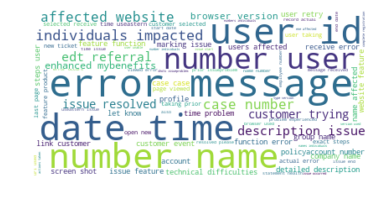

In [50]:
# Create stopword list: use the "remove_words" list to add stop words to the list
remove_words = ('entered', 'auto', 'ams', 'arm', 'metlife', 'l1', 'us', 'corporate', 'billing', 'system', 'byauto')
stopset = createStopWords(remove_words)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopset, background_color="white").generate(cleanText)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

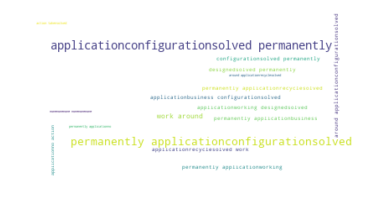

In [51]:
#create a list of lists out of the closing codes field in the inputDF
resolvelist = inputDF['rawCloseText'].tolist()
#combine the list of lists into a single list
resolvetext = " ".join(list for list in resolvelist)
# clean the text string
cleanResolveText = cleanString(resolvetext)
# Create stopword list: use the "remove_words" list to add stop words to the list
remove_words = ('entered', 'auto', 'ams', 'arm', 'metlife', 'l1', 'us', 'corporate', 'billing', 'system', 'byauto')
stopset = createStopWords(remove_words)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopset, background_color="white").generate(cleanResolveText)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()